<a href="https://colab.research.google.com/github/jeroserpa/PPE/blob/master/tunnel_gradient_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We load all the libraries and the image with OpenCV functions an then we resize it

---



(1512, 2688)


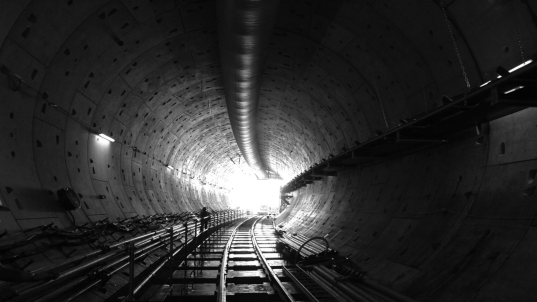

302 537


In [ ]:
import cv2 as cv,cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import imshow


image = cv2.imread("/content/metro1.png", 0)
print(image.shape)
scale_percent = 20 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

cv2_imshow(image)
h,w = image.shape
print(h,w)

## Aplying Gaussian Blur to eliminate unnecessary information and noise

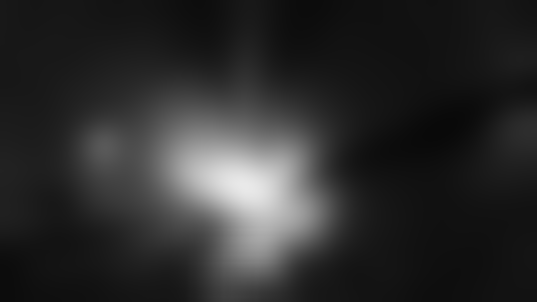

In [ ]:
image = cv.GaussianBlur(image,(101,101),0)
cv2_imshow(image)

## Calculating derivative in both x and y axes

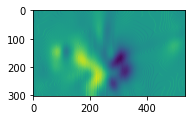

In [ ]:
img_sx = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=3)
img_sy = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=3)

plt.subplot(121)
imshow(img_sx)

## Calculating magnitude and orientation of gradient and drawing arrows

(520, 300)
(520, 300)


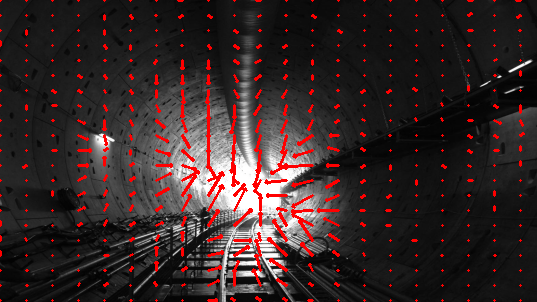

In [ ]:
image_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR) 
mag, angle = cv2.cartToPolar(img_sx, img_sy, angleInDegrees=False)
a_density = 20
for x in range(0,w,(int)(w/a_density)):
  for y in range(0,h,(int)(h/a_density)):
    start = (x,y)
    dx = (int)(mag[y][x]*np.cos(angle[y][x]))
    dy = (int)(mag[y][x]*np.sin(angle[y][x]))
    end = ( x + dx , y + dy)
    image_bgr=cv2.arrowedLine(image_bgr,start,end,(0, 0, 255),thickness=2 )

print(start)
print(end)
cv2_imshow(image_bgr)

Gradient magnitude


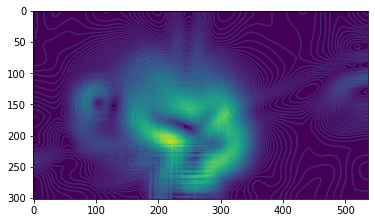

In [ ]:
imshow(mag)